<a href="https://colab.research.google.com/github/ja1708/machine-learning/blob/main/suicide_rate_analysis_using_decesion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sucide rate analysis using Decesion tree

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['master.csv']


In [ ]:
file_path = '../input/master.csv'
df = pd.read_csv(file_path)
df.head() # print the first few lines

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.describe() # print the statistics of the datasets

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [ ]:
df.columns # print columns of the datasets

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
# select columns from the dataset and prepare a new datasets
col = ['year', 'population',
       'suicides/100k pop',
        'gdp_per_capita ($)']
df1 = df[col]
print(df1.head())
y = df['suicides_no']
print(y.head())

   year  population  suicides/100k pop  gdp_per_capita ($)
0  1987      312900               6.71                 796
1  1987      308000               5.19                 796
2  1987      289700               4.83                 796
3  1987       21800               4.59                 796
4  1987      274300               3.28                 796
0    21
1    16
2    14
3     1
4     9
Name: suicides_no, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# devide the dataset into the
train_x, test_x, train_y, test_y = train_test_split(df1,y, test_size = 0.2)
print(train_x.shape, train_y.shape)
print(test_y.shape, test_x.shape)
print(train_x.head())

(22256, 4) (22256,)
(5564,) (5564, 4)
       year         ...          gdp_per_capita ($)
22350  2011         ...                       13204
3467   1987         ...                       16165
7184   1997         ...                        6314
3035   2001         ...                       12348
20539  2010         ...                       22994

[5 rows x 4 columns]


In [ ]:
train_x.head()

,year,population,suicides/100k pop,gdp_per_capita ($)
22350,2011,5026,0.00,13204
3467,1987,789200,34.59,16165
7184,1997,340800,17.90,6314
3035,2001,21392,0.00,12348
20539,2010,3137470,11.86,22994


In [ ]:
model = DecisionTreeRegressor(random_state =0)
model.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [ ]:
predict = model.predict(test_x)


<Figure size 432x288 with 0 Axes>

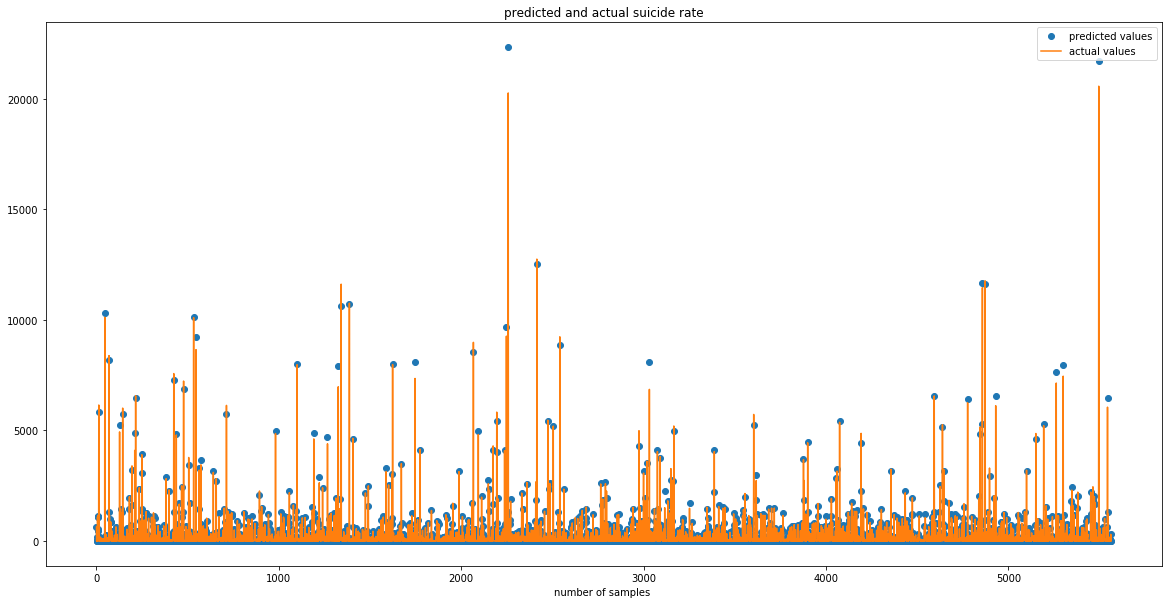

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.figure(figsize = (20,10))
plt.plot(np.arange(len(predict)),predict, 'o', label = "predicted values")
plt.title('predicted and actual suicide rate')
plt.xlabel("number of samples ")
#plt.figure(2)
plt.plot(np.arange(len(predict)),test_y.values, label = "actual values")
plt.legend(loc = 'best')
#plt.title('actual suicide rate')

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predict)

0.49712437095614664

In [ ]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, predict)

10.191229331416247

In [ ]:
# mean absolute percentage error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape(test_y, predict)

2.9936887061796837